In [30]:
# Import necessary libraries  
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression   
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.ensemble import RandomForestClassifier  
from imblearn.over_sampling import SMOTE  
import matplotlib.pyplot as plt  
import seaborn as sns  

In [2]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\alank\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Reading the data
df = pd.read_csv('creditcard.csv')

In [5]:
# Understanding the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.shape

(284807, 31)

In [9]:
print(df.isnull().sum())  

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
df = df.drop_duplicates() 

In [11]:
df.shape

(283726, 31)

In [12]:
df.dropna(inplace = True)

C:\Users\alank\AppData\Local\Temp\ipykernel_25688\1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


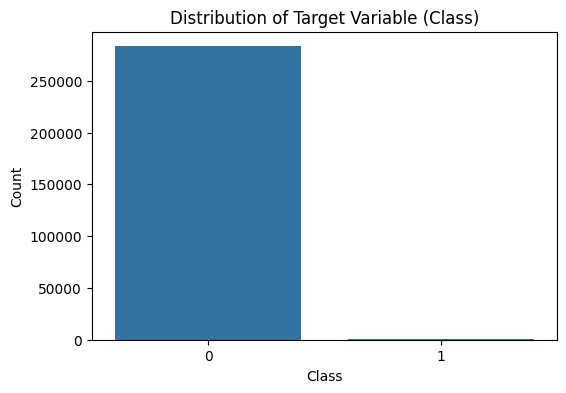

In [17]:
# Step 3: Exploratory Data Analysis (EDA)  
# 3.1: Check the distribution of the target variable  
plt.figure(figsize=(6, 4))  
sns.countplot(x='Class', data=df)  
plt.title('Distribution of Target Variable (Class)')  
plt.ylabel('Count')  
plt.xlabel('Class')  
plt.show() 

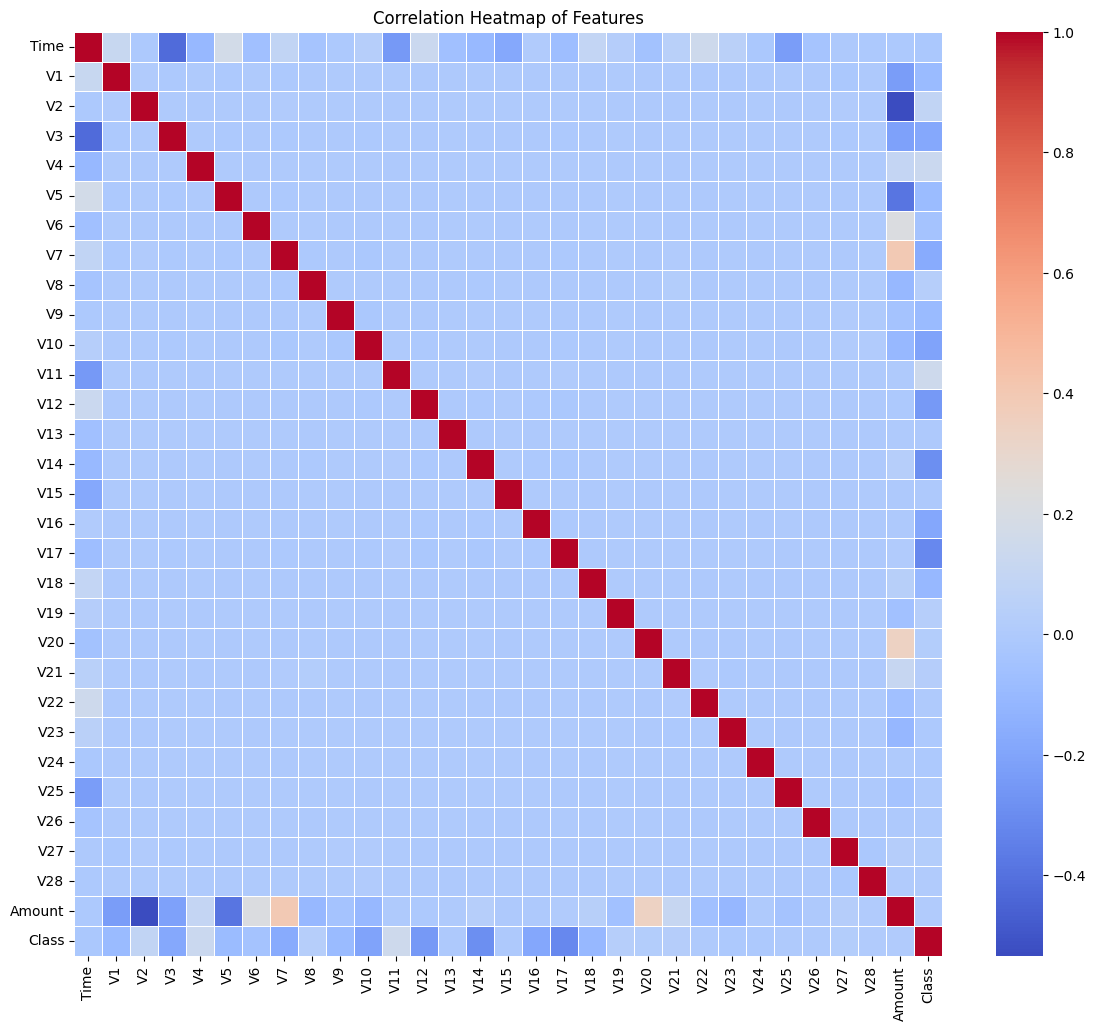

In [19]:
# 3.2: Correlation heatmap  
plt.figure(figsize=(14, 12))  
correlation = df.corr()  
sns.heatmap(correlation, cmap='coolwarm', annot=False, fmt='.1f', linewidths=0.5)  
plt.title('Correlation Heatmap of Features')  
plt.show() 

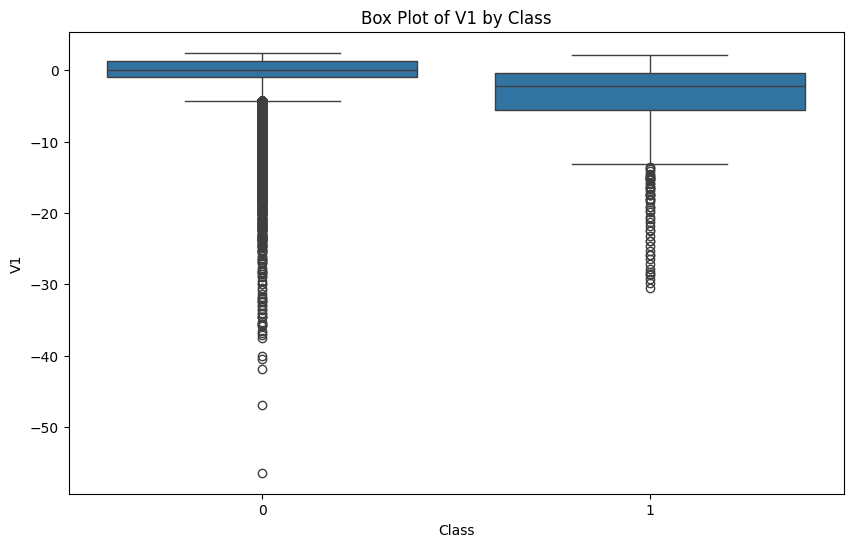

In [24]:
# 3.3 : Boxplot for comparison by class
plt.figure(figsize=(10, 6))  
sns.boxplot(x='Class', y='V1', data=df)  # Example with feature 'V1'  
plt.title('Box Plot of V1 by Class')  
plt.show()

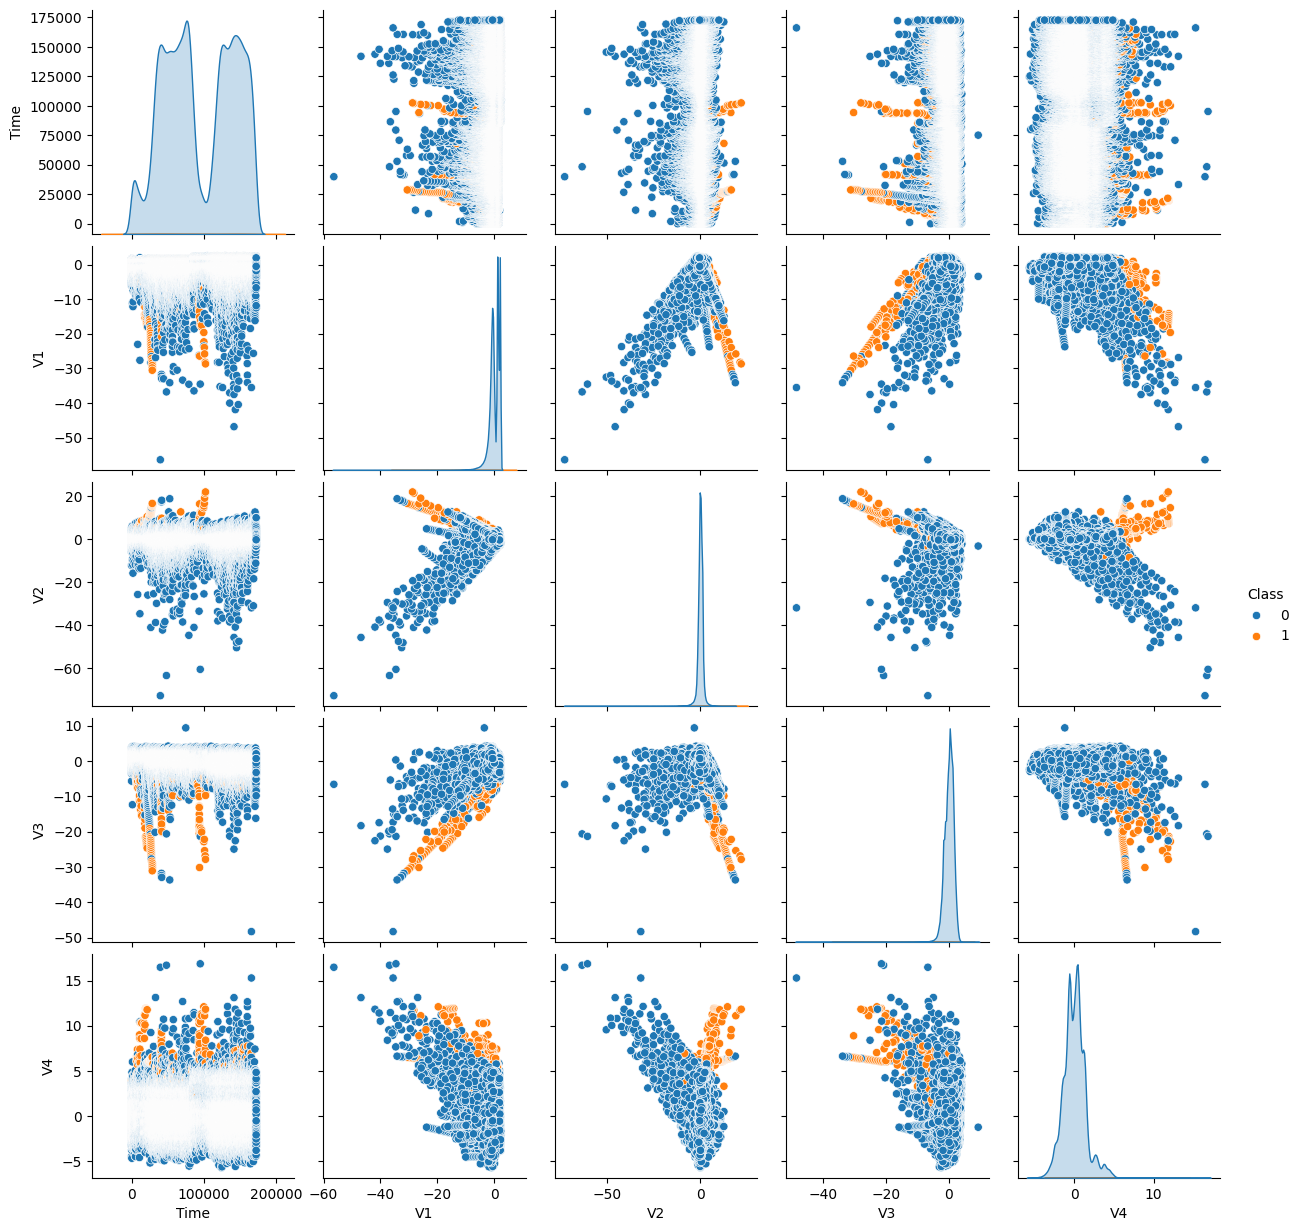

In [26]:
# 3.4: Pairplots for thr top 5 by time
sns.pairplot(df, hue='Class', vars=num_features[:5])    
plt.show()  

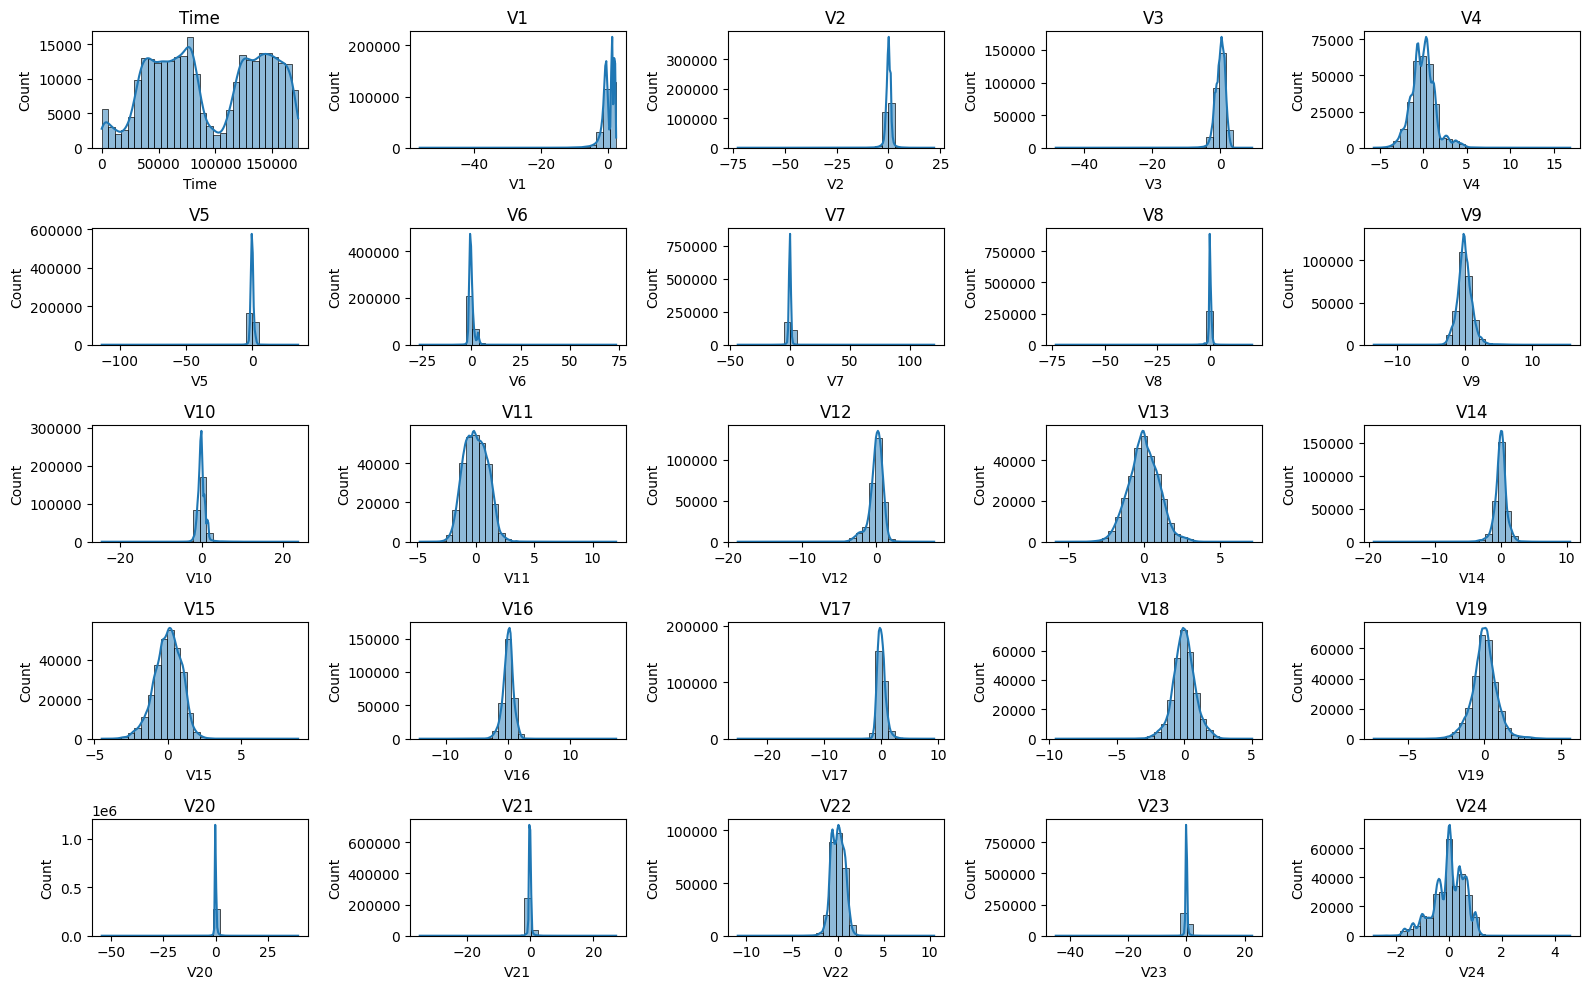

In [29]:
# 3.5: Subplots, Histograms for analyzing features
selected_features = num_features[:25]  # Adjust as needed  
plt.figure(figsize=(16, 10))  
for i, feature in enumerate(selected_features):  
    plt.subplot(5, 5, i + 1)  
    sns.histplot(df[feature], bins=30, kde=True)  
    plt.title(feature)  
plt.tight_layout()  
plt.show()

In [31]:
# Exclude the 'Class' column from the features  
X = df.drop(['Class'], axis=1)  
y = df['Class']  

In [32]:
# Standardize the features  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)  

In [37]:
# Handling class imbalance  
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


In [39]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()  

Amount details of the fraudulent transaction


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [41]:
print('details of valid transaction')
valid.Amount.describe()

details of valid transaction


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [42]:
# Using SMOTE for oversampling  
smote = SMOTE(random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)  

In [43]:
# Split the dataset into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)  

In [44]:
# Step 6: Train a logistic regression model  
logistic_model = LogisticRegression(max_iter=1000, random_state=42)  
logistic_model.fit(X_train, y_train)  

LogisticRegression(max_iter=1000, random_state=42)

In [45]:
# Evaluate the model's performance  
y_pred = logistic_model.predict(X_test)  

In [46]:
# Print classification report  
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.92      0.94     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



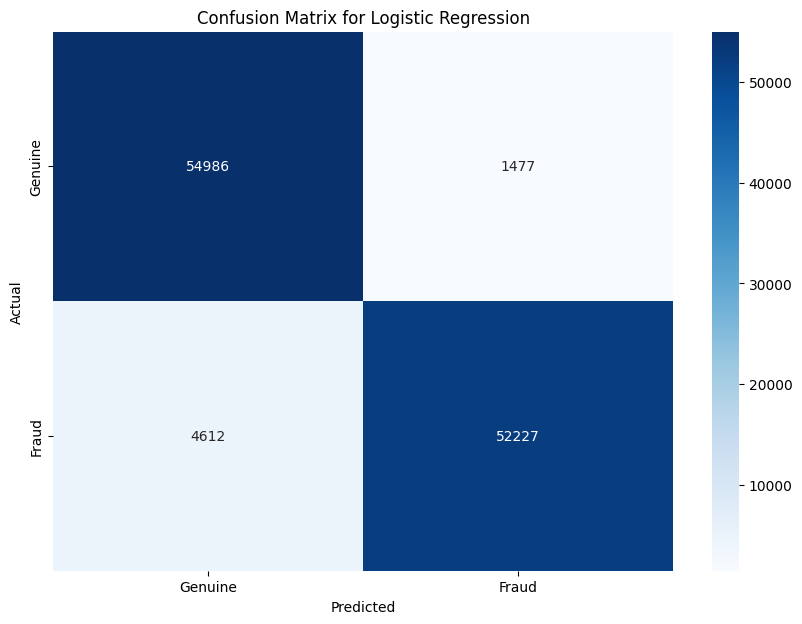

In [47]:
# Confusion matrix  
conf_matrix = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10, 7))  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Genuine", "Fraud"], yticklabels=["Genuine", "Fraud"])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix for Logistic Regression')  
plt.show()  

In [50]:
# Display accuracy  
accuracy = np.sum(y_pred == y_test) / len(y_test)  
print(f"Accuracy: {accuracy:.2f}")  

Accuracy: 0.95


In [55]:
sample_transaction = np.array([[0.0, -1.2, 1.0, 0.0, -0.5, 0.0, -1.0, -1.0, 0.2, 1.5,   
                                -0.2, 0.1, -1.0, 0.0, 0.5, -0.2, 0.0, -0.3, -1.0,   
                                -0.2, 1.0, -1.5, 0.0, 0.2, 1.0, 0.0, -0.3,   
                                0.1, 125.0, 0]])  # Example values  

In [52]:
sample_transaction = sample_transaction.reshape(1, -1)  

In [56]:
prediction = logistic_model.predict(sample_transaction) 

In [57]:
# Output the prediction  
if prediction[0] == 1:  
    print("The transaction is predicted to be fraudulent.")  
else:  
    print("The transaction is predicted to be legitimate.")  

The transaction is predicted to be fraudulent.
